In [1]:
import polars as pl
import utils

df = utils.full_dataset()

df

In [12]:
df.columns


['id',
 'type',
 'by',
 'time',
 'title',
 'text',
 'url',
 'score',
 'parent',
 'top_level_parent',
 'descendants',
 'kids',
 'deleted',
 'dead']

In [43]:
stories = df.filter(
    (
        (pl.col("type") == "story")
        & pl.col("time").is_not_null()
        & pl.col("text").is_not_null()
        & pl.col("url").is_null()
        & pl.col("deleted").is_null()
        & pl.col("dead").is_null()
    )
).select(["id", "title", "by", "text", "score", "descendants", "time"])

stories

id,title,by,text,score,descendants,time
i64,str,str,str,i64,i64,datetime[μs]
34192,"""Favorite PG essay?""","""terpua""","""<a href=""http://paulgraham.com…",14,21,2007-07-14 10:57:07
34423,"""Dear Lumber yard""","""daniel-cussen""","""Dear Sirs,<p>I write to solici…",1,1,2007-07-16 07:33:12
34461,"""Is it bad if I don't want to w…","""gregwebs""","""I have an opportunity to work …",17,86,2007-07-16 13:25:43
35007,"""Does the Google policy of allo…","""amichail""","""I'm curious about this. It see…",1,16,2007-07-18 16:29:43
36276,"""Just sent my resignation lette…","""euccastro""","""Hi folks. I've just sent in my…",23,49,2007-07-24 04:40:54
…,…,…,…,…,…,…
41811839,"""Ask HN: How does GTM for pre-r…","""kunarmando""","""Hey! While designing a pitch d…",1,1,2024-10-11 18:15:28
41812150,"""Ask HN: Did the rejection XHTM…","""paliderek""","""I have this notion that the ma…",4,1,2024-10-11 18:41:35
41812350,"""Ask HN: I have a quick questio…","""clickzyn""","""I would like to create a solut…",1,2,2024-10-11 18:58:46


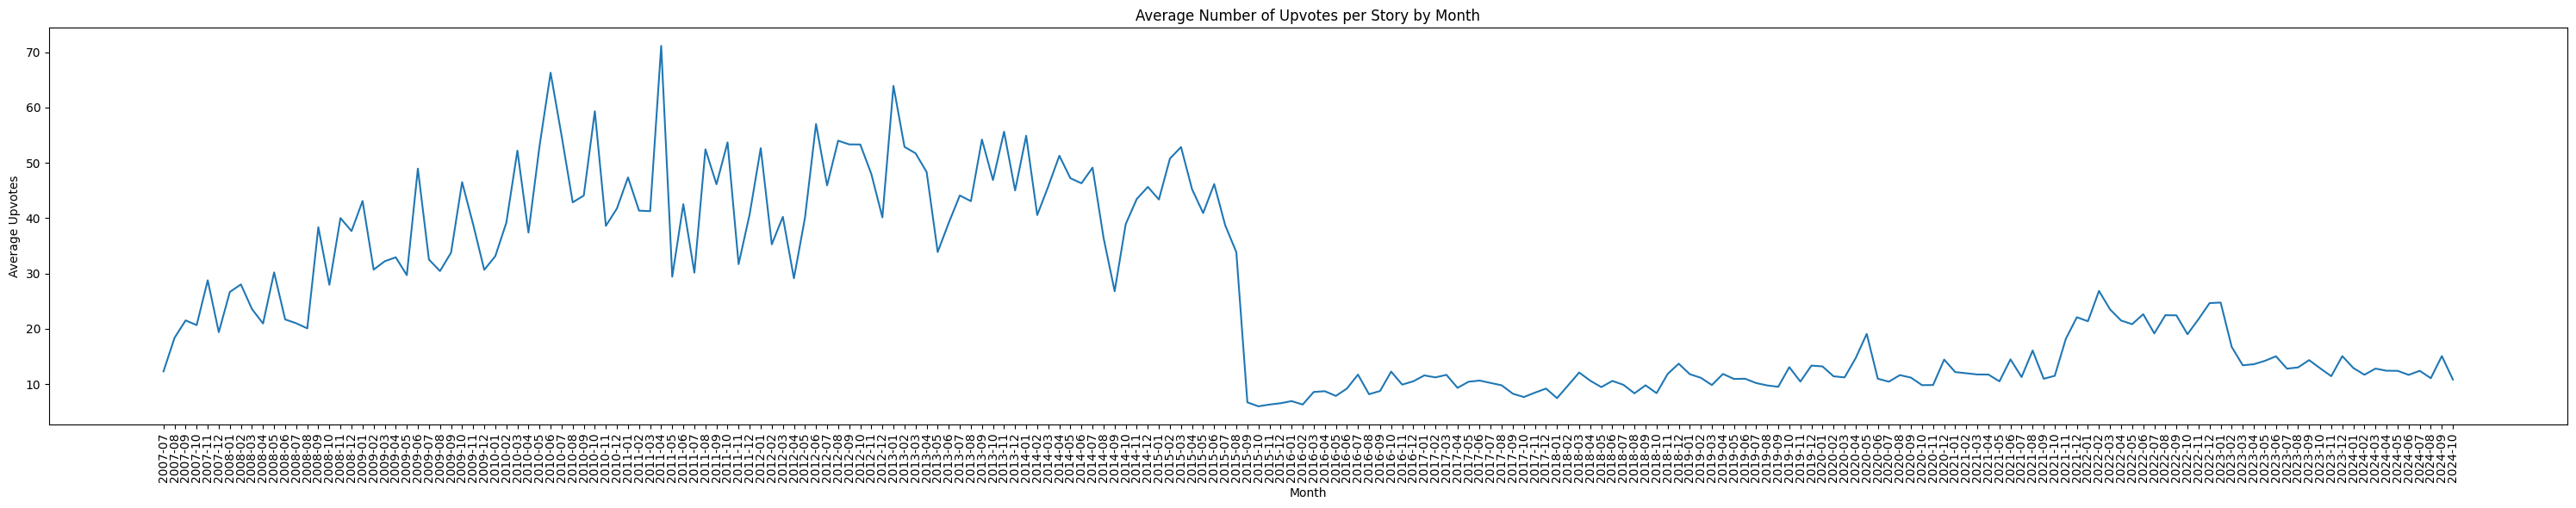

shape: (208, 2)
┌─────────┬─────────────┐
│ month   ┆ avg_upvotes │
│ ---     ┆ ---         │
│ str     ┆ f64         │
╞═════════╪═════════════╡
│ 2007-07 ┆ 12.307692   │
│ 2007-08 ┆ 18.375      │
│ 2007-09 ┆ 21.518519   │
│ 2007-10 ┆ 20.673913   │
│ 2007-11 ┆ 28.774194   │
│ …       ┆ …           │
│ 2024-06 ┆ 11.67331    │
│ 2024-07 ┆ 12.408938   │
│ 2024-08 ┆ 11.071203   │
│ 2024-09 ┆ 15.071553   │
│ 2024-10 ┆ 10.819413   │
└─────────┴─────────────┘


In [41]:
# Convert time to day
stories_with_day = stories.with_columns(
    pl.col("time").dt.strftime("%Y-%m").alias("month")
)

# Calculate average score (upvotes) per day
daily_avg_upvotes = (
    stories_with_day.group_by("month")
    .agg(pl.col("score").mean().alias("avg_upvotes"))
    .sort("month")
)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 6))  # Increased width to accommodate more data points
plt.plot(daily_avg_upvotes["month"], daily_avg_upvotes["avg_upvotes"])
plt.title("Average Number of Upvotes per Story by Month")
plt.xlabel("Month")
plt.ylabel("Average Upvotes")
plt.xticks(rotation=90)  # Increased rotation for better readability
plt.tight_layout()
plt.show()

# Display the data
print(daily_avg_upvotes)


shape: (208, 2)
┌─────────┬─────────────┐
│ month   ┆ num_stories │
│ ---     ┆ ---         │
│ str     ┆ u32         │
╞═════════╪═════════════╡
│ 2007-07 ┆ 13          │
│ 2007-08 ┆ 24          │
│ 2007-09 ┆ 27          │
│ 2007-10 ┆ 46          │
│ 2007-11 ┆ 31          │
│ …       ┆ …           │
│ 2024-06 ┆ 1154        │
│ 2024-07 ┆ 1186        │
│ 2024-08 ┆ 1264        │
│ 2024-09 ┆ 1146        │
│ 2024-10 ┆ 443         │
└─────────┴─────────────┘


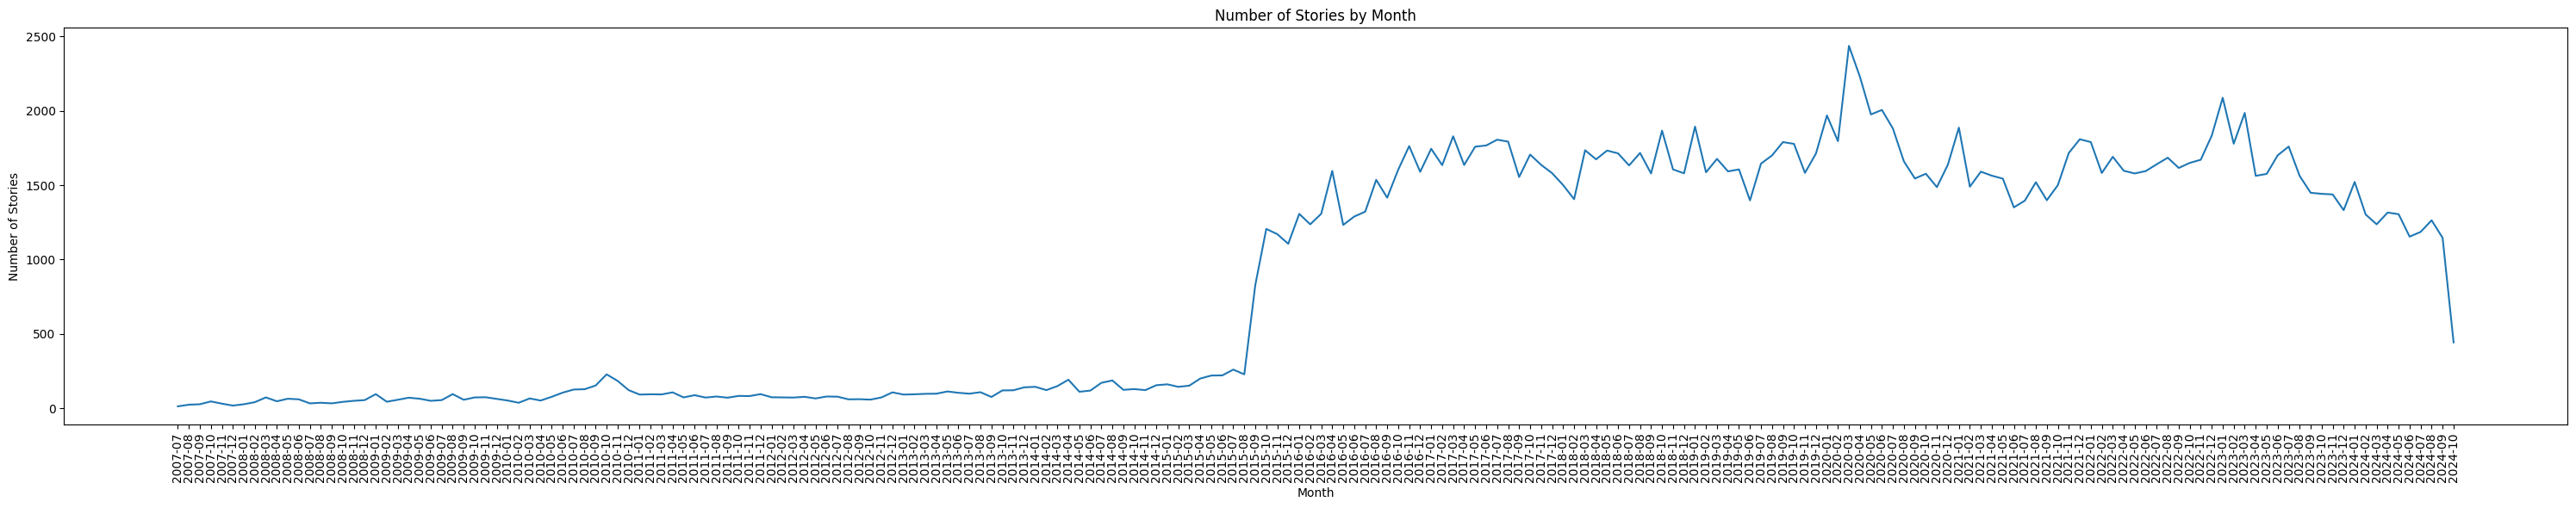

In [42]:
# plot the number of stories per month
stories_with_month = stories.with_columns(
    pl.col("time").dt.strftime("%Y-%m").alias("month")
)

stories_per_month = (
    stories_with_month.group_by("month")
    .agg(pl.col("id").count().alias("num_stories"))
    .sort("month")
)

plt.figure(figsize=(30, 6))
plt.plot(stories_per_month["month"], stories_per_month["num_stories"])
plt.title("Number of Stories by Month")
plt.xlabel("Month")
plt.ylabel("Number of Stories")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [44]:
# find the stories that were in July 2015
stories_in_july_2015 = stories.filter(
    (pl.col("time").dt.year() == 2015) & (pl.col("time").dt.month() == 7)
)

stories_in_july_2015


id,title,by,text,score,descendants,time
i64,str,str,str,i64,i64,datetime[μs]
9809333,"""Ask HN: Can you get to AWS?""","""cornellwright""","""We&#x27;re having lots of trou…",60,40,2015-07-01 00:50:16
9812245,"""Ask HN: Who is hiring? (July 2…","""whoishiring""","""Please lead with the location …",673,1087,2015-07-01 15:02:02
9812246,"""Ask HN: Freelancer? Seeking fr…","""whoishiring""","""Please lead with either SEEKIN…",89,108,2015-07-01 15:02:02
9812247,"""Ask HN: Who wants to be hired?…","""whoishiring""","""Share your information if you …",72,140,2015-07-01 15:02:02
9812261,"""Ask HN: Why Do We Act Like Elo…","""cconcepts""","""Granted, he is an insanely gif…",26,50,2015-07-01 15:03:05
…,…,…,…,…,…,…
9981996,"""Ask HN: What can be done to fi…","""JulianMorrison""","""Hacker News, I appeal to your …",18,42,2015-07-31 14:34:34
9982884,"""Ask HN: Who's looking for a co…","""dmnd""","""Last month this tread was resu…",15,7,2015-07-31 17:07:04
9982957,"""Show HN: WP Pluginator – A Wor…","""outsourceappz""","""Hello All,<p>We&#x27;ve create…",9,22,2015-07-31 17:21:52


In [45]:
# Find the stories in January 2016
stories_in_january_2016 = stories.filter(
    (pl.col("time").dt.year() == 2016) & (pl.col("time").dt.month() == 1)
)

stories_in_january_2016


id,title,by,text,score,descendants,time
i64,str,str,str,i64,i64,datetime[μs]
10820883,"""Ask HN: Offering dev. assistan…","""shivakaush""","""Hi All,<p>I feel my skills are…",5,1,2016-01-01 02:33:52
10821162,"""What can we expect from 2016 w…","""umeryounis""","""CRM has already worked wonders…",3,0,2016-01-01 05:17:51
10821555,"""A robust shell manager for fis…","""bucaran""","""Long time Oh My Fish! contribu…",1,2,2016-01-01 10:26:53
10821565,"""Ask HN: Job Differences with B…","""whiff""","""I&#x27;m currently studying Ba…",3,3,2016-01-01 10:42:13
10821695,"""When to use modal?""","""asakapab0i""","""I&#x27;m really interested in …",1,0,2016-01-01 12:11:17
…,…,…,…,…,…,…
11007847,"""Ask HN: What did you achieve i…","""spIrr""","""A month into 2016, I think it&…",21,32,2016-01-31 20:14:01
11007871,"""Common Lisp Tips""","""such_a_casual""","""http:&#x2F;&#x2F;lisptips.com<…",11,1,2016-01-31 20:20:24
11008115,"""Ask HN: Parse customers – Wher…","""srik1234""","""Parse Customers: Have you made…",2,0,2016-01-31 21:17:49


In [46]:
modern_stories = stories.filter((pl.col("time").dt.year() >= 2016))

modern_stories


id,title,by,text,score,descendants,time
i64,str,str,str,i64,i64,datetime[μs]
10820883,"""Ask HN: Offering dev. assistan…","""shivakaush""","""Hi All,<p>I feel my skills are…",5,1,2016-01-01 02:33:52
10821162,"""What can we expect from 2016 w…","""umeryounis""","""CRM has already worked wonders…",3,0,2016-01-01 05:17:51
10821555,"""A robust shell manager for fis…","""bucaran""","""Long time Oh My Fish! contribu…",1,2,2016-01-01 10:26:53
10821565,"""Ask HN: Job Differences with B…","""whiff""","""I&#x27;m currently studying Ba…",3,3,2016-01-01 10:42:13
10821695,"""When to use modal?""","""asakapab0i""","""I&#x27;m really interested in …",1,0,2016-01-01 12:11:17
…,…,…,…,…,…,…
41811839,"""Ask HN: How does GTM for pre-r…","""kunarmando""","""Hey! While designing a pitch d…",1,1,2024-10-11 18:15:28
41812150,"""Ask HN: Did the rejection XHTM…","""paliderek""","""I have this notion that the ma…",4,1,2024-10-11 18:41:35
41812350,"""Ask HN: I have a quick questio…","""clickzyn""","""I would like to create a solut…",1,2,2024-10-11 18:58:46


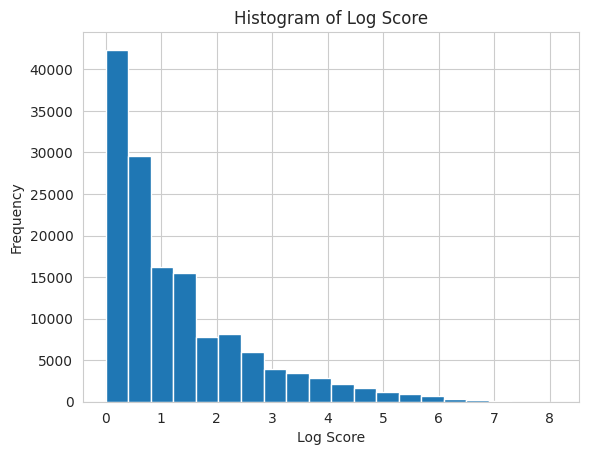

In [57]:
# add a new log_score column that is the log of the score
modern_stories = modern_stories.with_columns(pl.col("score").log().alias("log_score"))

# show a histogram of the log_score column
plt.hist(modern_stories["log_score"], bins=20)
plt.title("Histogram of Log Score")
plt.xlabel("Log Score")
plt.ylabel("Frequency")
plt.show()


In [58]:
modern_stories

id,title,by,text,score,descendants,time,log_score
i64,str,str,str,i64,i64,datetime[μs],f64
10820883,"""Ask HN: Offering dev. assistan…","""shivakaush""","""Hi All,<p>I feel my skills are…",5,1,2016-01-01 02:33:52,1.609438
10821162,"""What can we expect from 2016 w…","""umeryounis""","""CRM has already worked wonders…",3,0,2016-01-01 05:17:51,1.098612
10821555,"""A robust shell manager for fis…","""bucaran""","""Long time Oh My Fish! contribu…",1,2,2016-01-01 10:26:53,0.0
10821565,"""Ask HN: Job Differences with B…","""whiff""","""I&#x27;m currently studying Ba…",3,3,2016-01-01 10:42:13,1.098612
10821695,"""When to use modal?""","""asakapab0i""","""I&#x27;m really interested in …",1,0,2016-01-01 12:11:17,0.0
…,…,…,…,…,…,…,…
41811839,"""Ask HN: How does GTM for pre-r…","""kunarmando""","""Hey! While designing a pitch d…",1,1,2024-10-11 18:15:28,0.0
41812150,"""Ask HN: Did the rejection XHTM…","""paliderek""","""I have this notion that the ma…",4,1,2024-10-11 18:41:35,1.386294
41812350,"""Ask HN: I have a quick questio…","""clickzyn""","""I would like to create a solut…",1,2,2024-10-11 18:58:46,0.0


In [81]:
# Assign train/test/val splits
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

split_assignments = np.random.choice(
    ["train", "test", "val"], size=len(modern_stories), p=[0.8, 0.1, 0.1]
)

# Create a new column with random values
modern_stories = modern_stories.with_columns(pl.Series("split", split_assignments))

modern_stories

id,title,by,text,score,descendants,time,log_score,random,split
i64,str,str,str,i64,i64,datetime[μs],f64,f64,str
10820883,"""Ask HN: Offering dev. assistan…","""shivakaush""","""Hi All,<p>I feel my skills are…",5,1,2016-01-01 02:33:52,1.609438,0.37454,"""train"""
10821162,"""What can we expect from 2016 w…","""umeryounis""","""CRM has already worked wonders…",3,0,2016-01-01 05:17:51,1.098612,0.950714,"""val"""
10821555,"""A robust shell manager for fis…","""bucaran""","""Long time Oh My Fish! contribu…",1,2,2016-01-01 10:26:53,0.0,0.731994,"""train"""
10821565,"""Ask HN: Job Differences with B…","""whiff""","""I&#x27;m currently studying Ba…",3,3,2016-01-01 10:42:13,1.098612,0.598658,"""train"""
10821695,"""When to use modal?""","""asakapab0i""","""I&#x27;m really interested in …",1,0,2016-01-01 12:11:17,0.0,0.156019,"""train"""
…,…,…,…,…,…,…,…,…,…
41811839,"""Ask HN: How does GTM for pre-r…","""kunarmando""","""Hey! While designing a pitch d…",1,1,2024-10-11 18:15:28,0.0,0.382187,"""train"""
41812150,"""Ask HN: Did the rejection XHTM…","""paliderek""","""I have this notion that the ma…",4,1,2024-10-11 18:41:35,1.386294,0.926159,"""val"""
41812350,"""Ask HN: I have a quick questio…","""clickzyn""","""I would like to create a solut…",1,2,2024-10-11 18:58:46,0.0,0.399347,"""train"""


In [77]:
import html
import tqdm


def serialize_story(story):
    return f"""
{story["title"]}
by {story["by"]}, {story["time"].strftime("%B %d, %Y")}

{html.unescape(story["text"]).replace("<p>", "\n\n")}
"""


print(serialize_story(modern_stories.row(0, named=True)))



Ask HN: Offering dev. assistance on your projects
by shivakaush, January 01, 2016

Hi All,

I feel my skills are stagnating so looking to work on some projects + I've been working solo for too long and it would be nice to work with someone with a different perspective and experience.

Looking to work on any stack, as long as the project is non-commercial. I could contribute to a OSS project but I'm looking for a more 1-on-1 type project experience.

Happy New Year !

tldr; Looking to assist on your personal non-commercial projects, web stacks prefered. email is on profile page.



In [7]:
import importlib
import utils

importlib.reload(utils)
utils.stories_dataset.bust_cache()
utils.stories_dataset()


Cache busted for ./data/stories_dataset.parquet


Serializing stories: 100%|██████████| 142886/142886 [00:07<00:00, 18604.53it/s]


Caching dataframe to ./data/stories_dataset.parquet


id,title,by,text,score,descendants,time,log_score,serialized,split
i64,str,str,str,i64,i64,datetime[μs],f64,str,str
21152718,"""Integrated Whatsapp Apps – Wha…","""fynnmerlevede""","""Since Whatsapps API is open fo…",2,0,2019-10-03 22:02:15,0.693147,""" Integrated Whatsapp Apps – Wh…","""train"""
14653564,"""Ask HN: As an employee of a co…","""dpflan""","""What indicators do you look at…",273,192,2017-06-28 12:45:04,5.609472,""" Ask HN: As an employee of a c…","""train"""
34006028,"""Ask HN: What do you look for i…","""inasmuch""","""I&#x27;m a designer (product, …",1,2,2022-12-15 21:29:03,0.0,""" Ask HN: What do you look for …","""train"""
37741338,"""Ask HN: Should I Keep the “Co-…","""kidsil""","""This month marks a time for a …",3,7,2023-10-02 17:18:01,1.098612,""" Ask HN: Should I Keep the “Co…","""train"""
40231402,"""Ask cloud-file-storage and sem…","""math101""","""I am looking for a service whi…",1,0,2024-05-02 00:34:03,0.0,""" Ask cloud-file-storage and se…","""train"""
…,…,…,…,…,…,…,…,…,…
14671460,"""Ask HN: What are some investig…","""cpete""","""This is inspired by the &quot;…",2,0,2017-06-30 15:46:22,0.693147,""" Ask HN: What are some investi…","""train"""
32573243,"""Ask HN: Monochrome LCD display…","""dv35z""","""Hey HN crew - Trying to cobbl…",1,2,2022-08-23 23:56:58,0.0,""" Ask HN: Monochrome LCD displa…","""train"""
18537743,"""Kharagpur Winter of Code is a …","""rava-dosa""","""Hi! We are organizing third ed…",3,0,2018-11-26 23:18:48,1.098612,""" Kharagpur Winter of Code is a…","""train"""


In [1]:
tokenizer["asdf"]

NameError: name 'tokenizer' is not defined

In [15]:
from datasets import Dataset
import polars as pl
from transformers import AutoTokenizer
import utils


def create_dataset(split, num_rows, tokenizer):
    stories = utils.stories_dataset()
    stories = stories.filter(pl.col("split") == split).head(num_rows)

    stories = stories.with_columns(
        [
            pl.col("serialized").alias("text"),
            pl.col("score").alias("label").cast(pl.Float32),
        ]
    )

    stories = stories.with_columns(
        [
            pl.col("text")
            .map_elements(lambda x: tokenizer(x)["input_ids"])
            .alias("input_ids"),
            pl.col("label"),
        ]
    ).select(["input_ids", "label"])
    return Dataset.from_polars(stories)


tokenizer = AutoTokenizer.from_pretrained("unsloth/Meta-Llama-3.1-8B")

create_dataset("val", 10, tokenizer)["label"]

sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.


[3, 26, 7, 9, 4, 6, 3, 8, 1, 269]